In [132]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [133]:
Server = 'JARVIS\SQLEXPRESS'
DB = 'CLAYTON'
connection = pyodbc.connect('DRIVER={SQL Server}; SERVER=' + Server + '; DATABASE=' + DB + '; Trusted_Connection=yes')

In [134]:
query_SQLTable = "SELECT * FROM cats"
SQLTable = pd.read_sql(query_SQLTable, connection)
SQLTable.head()

,column1,Sex,Bwt,Hwt
0,1,F,2,7
1,2,F,2,7.4
2,3,F,2,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


In [135]:
SQLTable['Bwt']=pd.to_numeric(SQLTable['Bwt'])
SQLTable['Hwt']=pd.to_numeric(SQLTable['Hwt'])
SQLTable = SQLTable.drop(['column1'], axis=1)
SQLTable.head()

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


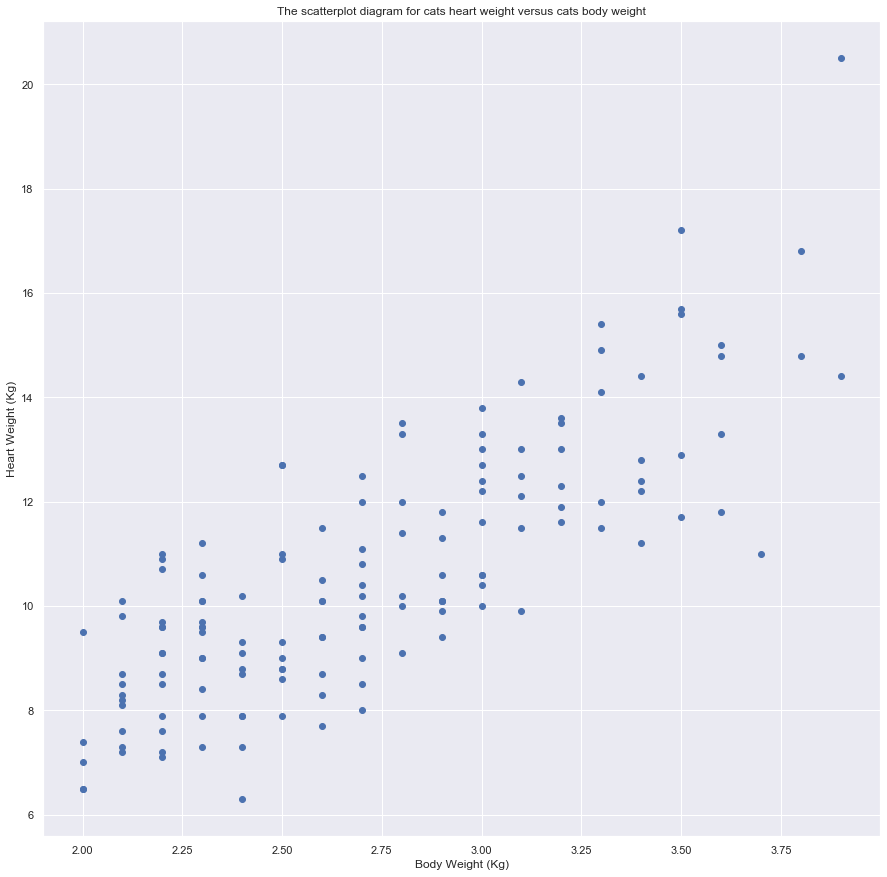

In [136]:
plt.rcParams["figure.figsize"] = (15, 15)
plt.scatter(SQLTable['Bwt'], SQLTable['Hwt'])
plt.ylabel('Heart Weight (Kg)')
plt.xlabel('Body Weight (Kg)')
plt.title("The scatterplot diagram for cats heart weight versus cats body weight")
plt.show()

### The plot above shows a strong positive linear relationship between heart weight and the body weight of the cats

In [108]:
SQLTable = SQLTable.drop(['Sex'], axis=1)
SQLTable.head()

,Bwt,Hwt
0,2,7
1,2,7.4
2,2,9.5
3,2.1,7.2
4,2.1,7.3


### The fitted model for the data

In [137]:
y = SQLTable['Hwt']
x = SQLTable['Bwt']
x = sm.add_constant(x)
results = sm.OLS(y,x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    Hwt   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     259.8
Date:                Fri, 18 Mar 2022   Prob (F-statistic):           6.97e-34
Time:                        21:19:33   Log-Likelihood:                -257.06
No. Observations:                 144   AIC:                             518.1
Df Residuals:                     142   BIC:                             524.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3567      0.692     -0.515      0.6

### The fitted model for the data is Hwt = -0.3567 + 4.0341Bwt

### The intercept does not make any sense because if the body weight of the cat is equal to zero, the heart weight will be – 0.3567 which is negative. We can never have negative weight. We can see that whenever there is an increase in body weight by one unit, the heart weight increases by 4.0431 grams.

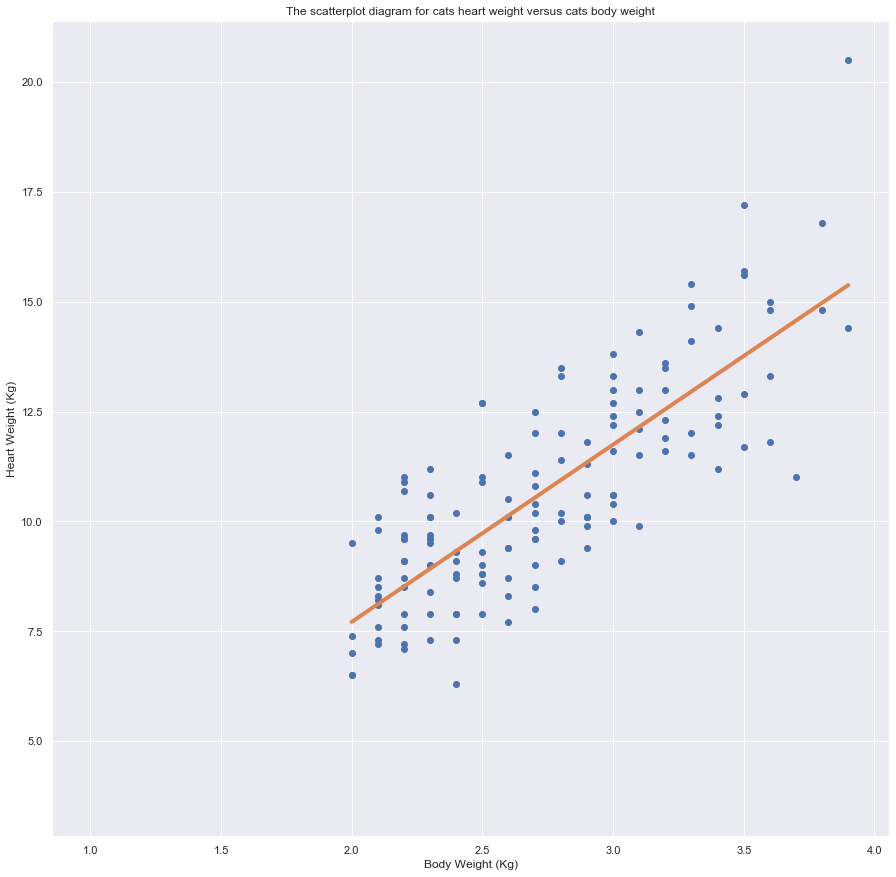

In [141]:
plt.rcParams["figure.figsize"] = (15, 15)
Hwt = -0.3567 + 4.0341*x
plt.plot(x.astype(float), Hwt, lw=4)
plt.scatter(SQLTable['Bwt'], SQLTable['Hwt'])
plt.ylabel('Heart Weight (Kg)')
plt.xlabel('Body Weight (Kg)')
plt.title("The scatterplot diagram for cats heart weight versus cats body weight")
plt.show()

In [142]:
influence = results.get_influence()
standardized_residuals = influence.resid_studentized_internal
print(standardized_residuals)


[-0.49546583 -0.21690413  1.24554478 -0.63581922 -0.56632084 -0.35782573
 -0.01033388  0.0591645   0.12866287  0.26765961  0.40665635  1.17113843
 -0.98397244  0.12607698  0.40358934  0.81985787  1.65239494  1.72177303
 -1.1234889  -0.70781342 -0.3614172   0.05425828  0.05425828  0.4006545
  0.46993375  0.539213    0.81632998  0.81632998  1.16272621  1.57840168
 -2.09340841 -0.43257074 -0.36336917  0.60545281 -0.5037163   0.81003585
 -0.9895712  -0.02204615 -0.02204615 -1.40626922 -0.23167598  0.18288634
 -0.99686941 -0.8586188  -0.8586188  -0.79238513  0.8677473  -0.84366795
 -0.84366795  1.37963355 -0.91459435 -0.637082   -0.42894773 -0.0126792
  0.40358934  0.75047978  0.75047978  1.51363876  0.46993375 -1.40139271
 -0.98618329 -0.98618329 -0.15576446 -0.01736132 -1.26430965 -0.7802957
 -0.642006   -0.642006   -0.29628175  0.8791807   2.05464314  2.05464314
 -1.68066052 -1.26600693 -0.50580868 -0.50580868  0.25438958  0.9454789
 -1.75173782 -1.06080062 -0.6462383  -0.6462383  -0.508

### The residual plots for the data

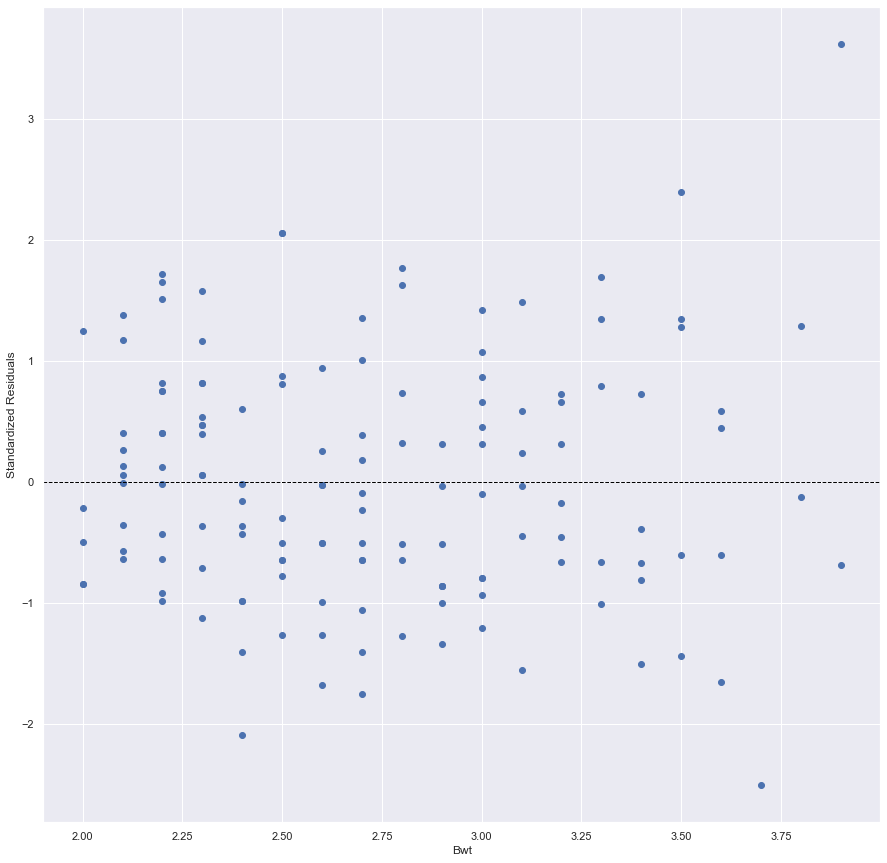

In [143]:
plt.scatter(SQLTable['Bwt'], standardized_residuals)
plt.xlabel('Bwt')
plt.ylabel('Standardized Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

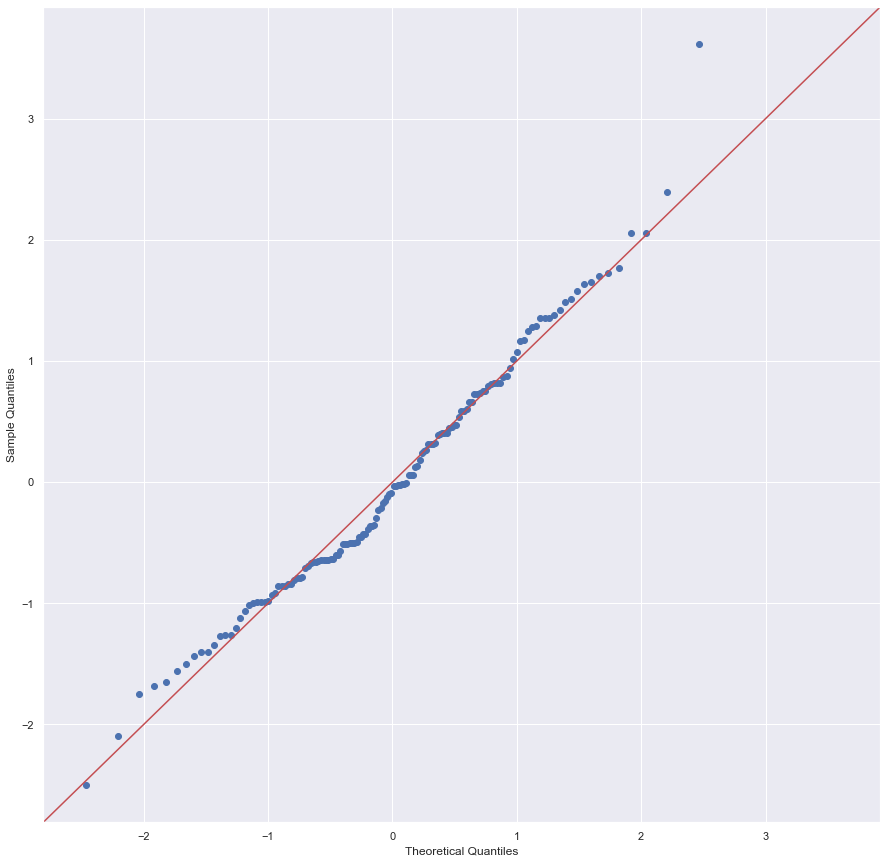

In [144]:
fig = sm.qqplot(standardized_residuals, line='45')
plt.show()

### The observed data with fitted line and showing a 95% pointwise confidence bounds for points on the fitted line. 


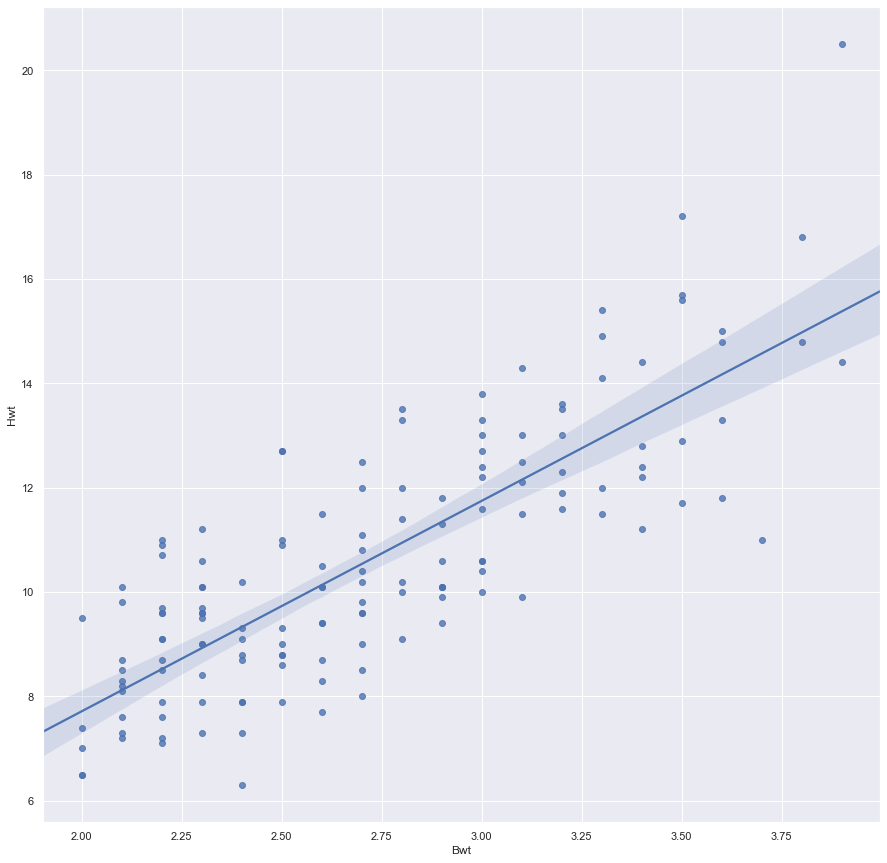

In [145]:
ax = sns.regplot(SQLTable['Bwt'].astype(float), SQLTable['Hwt'].astype(float))

### Very few of our observed lie within the 95% bounds which can give us some confidence to conclude that the fitted data may not be the perfect one for the data.